In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Grab and process the raw data.
data_path = ("amazon_cells_labelled.txt"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['review', 'pos']


In [4]:
sms_raw['review'] = sms_raw['review'].str.lower()

In [5]:
sms_raw.head()

,review,pos
0,so there is no way for me to plug it in here i...,0
1,"good case, excellent value.",1
2,great for the jawbone.,1
3,tied to charger for conversations lasting more...,0
4,the mic is great.,1


In [7]:
keywords = ['good', 'great', 'wonderful', 'awesome', 'reccomend', 'perfect', 'terrific', 'nice', 'highly', 'well', 'works']

for key in keywords:
    sms_raw[str(key)] = sms_raw.review.str.contains(
        str(key),
        case=True
    )

In [8]:
sms_raw['pos'] = (sms_raw['pos'] == 1)

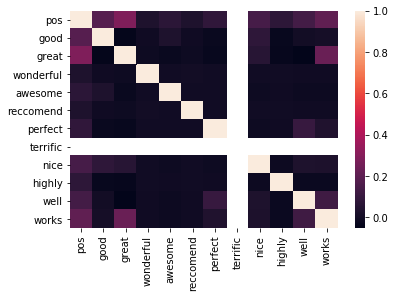

In [9]:
sns.heatmap(sms_raw.corr())

In [10]:
data = sms_raw[keywords]
target = sms_raw['pos']

In [11]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 302


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

#
#             Predicted no:   Predicted yes:
#   Actual No:
#  Actual Yes:

array([[471,  29],
       [273, 227]])

In [100]:
# Grab and process the raw data.
data_path = ("amazon_cells_labelled.txt"
            )
iter1 = pd.read_csv(data_path, delimiter= '\t', header=None)
iter1.columns = ['review', 'pos']


In [101]:
iter1['review'] = iter1['review'].str.lower()
iter1.head()

,review,pos
0,so there is no way for me to plug it in here i...,0
1,"good case, excellent value.",1
2,great for the jawbone.,1
3,tied to charger for conversations lasting more...,0
4,the mic is great.,1


In [102]:
keywords = ['good', 'great', 'wonderful', 'sweet', 'suprised', 'awesome', 'perfect', 'nice', 'highly', 'well', 'works', 'exactly']

for key in keywords:
    iter1[str(key)] = iter1.review.str.contains(
        str(key),
        case=True
    )
    
badwords = ['bad', 'awful', 'terrible', 'broken', 'never', "don't buy", 'wasted', 'disappoint', 'can not']


for badkey in badwords:
    iter1[str(badkey)] = ~iter1.review.str.contains(
        str(badkey),
        case=True
    )


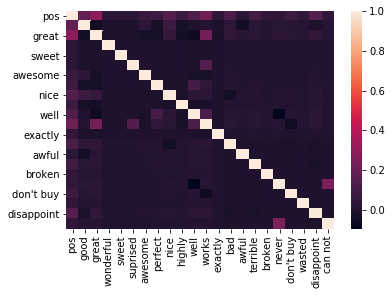

In [103]:
sns.heatmap(iter1.corr())

In [104]:

data = iter1[keywords + badwords]
target = iter1['pos']


bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 297


In [105]:
confusion_matrix(target, y_pred)

array([[474,  26],
       [271, 229]])

In [107]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=5)

array([0.745, 0.705, 0.705, 0.65 , 0.67 ])


    Do any of your classifiers seem to overfit?
    
    No classifiers seem overfit. This is bernoulli so that is kind of rare.
    
    Which seem to perform the best? Why?
    
    Good and great seem to catch a lot of the positive reviews.
    
